In [1]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [2]:
using LazyGrids,SpecialFunctions,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

fun (generic function with 1 method)

In [9]:
mat1 = material(1.33^2,1.0)
mat2 = material(1.0,1.0)

k₀ = 2π/620.0
NA = .8

dip=[1.,0.,0.]
pos=[0.,0.0,0.]

dip=dipole(mat1,k₀,pos,dip);

In [10]:
x = 3000*collect(range(-1.,1.,length=501))
y = 3000*collect(range(-1.,1.,length=501));

In [11]:
e1= eplane(dip,x,y,1,50.0);

In [12]:
angular=Angular(x,y,e1,mat1,k₀,1,2)
fl = far(angular)
lens=lensimage2(angular,mat2,NA)
efar = efieldC(lens,fl.far)
ifar = real.(sum(conj(efar).*efar,dims=3)[:,:,1]);

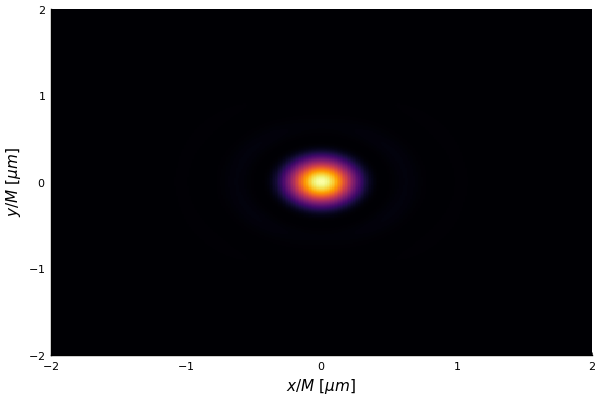

In [13]:
heatmap(x/1000,y/1000,ifar,ylims=(-2,2),xlims=(-2,2),xlabel=L"x/M~[\mu m]",ylabel=L"y/M~[\mu m]",colorbar=:none)